In [34]:
import json, os, sys
import subprocess
from pathlib import Path

import pandas as pd

import tqdm

WORK_DIR = Path.cwd().parent
print(f"Work directory: {WORK_DIR}")


Work directory: /home/lusha/star_code


In [26]:
video_dir = WORK_DIR / "data/datasets/action-genome/Charades_v1_480"


In [3]:
sys.path.append(str(WORK_DIR / 'src'))

import STAR_utils.visualization_tools.qa_visualization as qaviz


In [4]:
with open(WORK_DIR / "data/datasets/STAR/STAR_annotations/STAR_val.json") as in_file:
    star_data = json.load(in_file)

print(len(star_data))


7098


The data is stored in json format as a list of objects. The object is centered around the question (i.e. the question works as the foundamental element to be used as id), and all other inforamation are correlate to the question. That is to say that each object contains the question and the other informations like gorunding video, scene graph etc.

In [5]:
test_id = 101
test_sample = star_data[test_id]
list(test_sample.keys())


['question_id',
 'question',
 'video_id',
 'start',
 'end',
 'answer',
 'question_program',
 'choices',
 'situations']

Let's have a look at the scene graph correlated to the question.

In [6]:
test_sample['choices']


[{'choice_id': 0,
  'choice': 'The sandwich.',
  'choice_program': [{'function': 'Equal', 'value_input': ['sandwich']}]},
 {'choice_id': 1,
  'choice': 'The medicine.',
  'choice_program': [{'function': 'Equal', 'value_input': ['medicine']}]},
 {'choice_id': 2,
  'choice': 'The clothes.',
  'choice_program': [{'function': 'Equal', 'value_input': ['clothes']}]},
 {'choice_id': 3,
  'choice': 'The window.',
  'choice_program': [{'function': 'Equal', 'value_input': ['window']}]}]

In [7]:
test_sample['answer']


'The sandwich.'

In [8]:
test_sample['situations']


{'000153': {'rel_pairs': [['o000', 'o028'],
   ['o000', 'o028'],
   ['o000', 'o016'],
   ['o000', 'o016']],
  'rel_labels': ['r009', 'r002', 'r009', 'r002'],
  'actions': ['a051'],
  'bbox': [[90.05, 176.79, 103.43, 190.5],
   [91.62, 176.57, 103.16, 190.42],
   [64.53, 140.75, 124.1, 348.32]],
  'bbox_labels': ['o028', 'o016', 'o000']},
 '000188': {'rel_pairs': [['o000', 'o028'],
   ['o000', 'o028'],
   ['o000', 'o014'],
   ['o000', 'o014'],
   ['o000', 'o014'],
   ['o000', 'o016'],
   ['o000', 'o016']],
  'rel_labels': ['r009', 'r002', 'r009', 'r004', 'r003', 'r009', 'r002'],
  'actions': ['a051'],
  'bbox': [[121.69, 171.11, 133.14, 184.65],
   [134.26, 158.83, 140.57, 166.44],
   [122.52, 169.68, 135.62, 184.51],
   [78.95, 137.09, 153.44, 337.95]],
  'bbox_labels': ['o028', 'o014', 'o016', 'o000']},
 '000159': {'rel_pairs': [['o000', 'o028'],
   ['o000', 'o028'],
   ['o000', 'o014'],
   ['o000', 'o014'],
   ['o000', 'o014'],
   ['o000', 'o016'],
   ['o000', 'o016']],
  'rel_labels

In [9]:
graph_dict = dict()

for frame_id, frame_info in test_sample['situations'].items():
    graph_dict[frame_id] = []
    for i in range(len(frame_info['rel_pairs'])):

        assert len(frame_info['rel_pairs']) == len(frame_info['rel_labels'])
        
        entry = (frame_info['rel_pairs'][i][0], frame_info['rel_labels'][i], frame_info['rel_pairs'][i][1])
        graph_dict[frame_id].append(entry)

graph_dict


{'000153': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 'r009', 'o016'),
  ('o000', 'r002', 'o016')],
 '000188': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 'r009', 'o014'),
  ('o000', 'r004', 'o014'),
  ('o000', 'r003', 'o014'),
  ('o000', 'r009', 'o016'),
  ('o000', 'r002', 'o016')],
 '000159': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 'r009', 'o014'),
  ('o000', 'r004', 'o014'),
  ('o000', 'r003', 'o014'),
  ('o000', 'r009', 'o016'),
  ('o000', 'r002', 'o016')],
 '000222': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 'r009', 'o014'),
  ('o000', 'r003', 'o014'),
  ('o000', 'r009', 'o016'),
  ('o000', 'r002', 'o016')],
 '000246': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 'r009', 'o014'),
  ('o000', 'r003', 'o014'),
  ('o000', 'r004', 'o014'),
  ('o000', 'r009', 'o016'),
  ('o000', 'r002', 'o016')],
 '000217': [('o000', 'r009', 'o028'),
  ('o000', 'r002', 'o028'),
  ('o000', 

In [10]:
qaviz.Vis_Question_Answer_Options(test_sample)


	Q: Which object was eaten by the person? 

	Answer: The sandwich.
	Option: The medicine.
	Option: The clothes.
	Option: The window.




In [11]:
qaviz.Vis_SituationGraph(test_sample, 1_000)


0 Frame ID: 000153
Subgraph:
	 Actions:
		 eat a sandwich
	 Relationships:
		 person  ----  holding  ----  food
		 person  ----  in_front_of  ----  food
		 person  ----  holding  ----  sandwich
		 person  ----  in_front_of  ----  sandwich


1 Frame ID: 000159
Subgraph:
	 Actions:
		 eat a sandwich
	 Relationships:
		 person  ----  holding  ----  food
		 person  ----  in_front_of  ----  food
		 person  ----  holding  ----  phone/camera
		 person  ----  above  ----  phone/camera
		 person  ----  on_the_side_of  ----  phone/camera
		 person  ----  holding  ----  sandwich
		 person  ----  in_front_of  ----  sandwich


2 Frame ID: 000188
Subgraph:
	 Actions:
		 eat a sandwich
	 Relationships:
		 person  ----  holding  ----  food
		 person  ----  in_front_of  ----  food
		 person  ----  holding  ----  phone/camera
		 person  ----  above  ----  phone/camera
		 person  ----  on_the_side_of  ----  phone/camera
		 person  ----  holding  ----  sandwich
		 person  ----  in_front_of  ----  sandwich

In [12]:
type(test_sample['situations'].keys())


dict_keys

## Video data

In [17]:
star_data_df = pd.DataFrame(star_data)
star_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098 entries, 0 to 7097
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question_id       7098 non-null   object 
 1   question          7098 non-null   object 
 2   video_id          7098 non-null   object 
 3   start             7098 non-null   float64
 4   end               7098 non-null   float64
 5   answer            7098 non-null   object 
 6   question_program  7098 non-null   object 
 7   choices           7098 non-null   object 
 8   situations        7098 non-null   object 
dtypes: float64(2), object(7)
memory usage: 499.2+ KB


In [47]:
star_data_df['video_id']


0       6H78U
1       6H78U
2       RNLTR
3       RNLTR
4       VNQTH
        ...  
7093    L9ANI
7094    L9ANI
7095    L9ANI
7096    L9ANI
7097    Z97SD
Name: video_id, Length: 7098, dtype: object

In [ ]:
import csv

outfile = WORK_DIR / "data/datasets/STAR/video_ids_val.cvs"

video_ids = star_data_df['video_id'].unique()
with open(outfile, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows([[item] for item in video_ids])


In [25]:
star_data_df.groupby(['video_id', 'start', 'end']).ngroups


3373

In [37]:
def get_video_duration(video_path):
    """Get video duration in seconds using ffprobe."""
    cmd = [
        'ffprobe',
        '-v', 'error',
        '-show_entries', 'format=duration',
        '-of', 'default=noprint_wrappers=1:nokey=1',
        video_path
    ]
    try:
        output = subprocess.check_output(cmd, stderr=subprocess.STDOUT)
        duration = float(output)
        return duration
    except subprocess.CalledProcessError as e:
        print(f"\nError getting duration for {video_path}: {e.output.decode('utf-8')}")
        return None
    except ValueError:
        print(f"\nCould not parse duration for {video_path}")
        return None

def process_videos_directory(directory):
    """Process all video files in directory and return duration info."""
    video_info = []
    
    # First count how many video files we have
    video_files = [
        filename for filename in os.listdir(directory)
        if os.path.isfile(os.path.join(directory, filename)) and
        filename.lower().endswith('.mp4')
    ]
    
    # Process with progress bar
    for filename in tqdm(video_files, desc="Processing videos", unit="video"):
        filepath = os.path.join(directory, filename)
        duration = get_video_duration(filepath)
        if duration is not None:
            video_id = os.path.splitext(filename)[0]
            video_info.append({
                'video_id': video_id,
                'length': duration
            })
    
    return video_info



In [39]:
video_files = [
        filename for filename in os.listdir(video_dir)
        if os.path.isfile(os.path.join(video_dir, filename)) and
        filename.lower().endswith('.mp4')
    ]


In [45]:
video_ids = set(star_data_df['video_id'])
len(video_ids)


914

In [46]:
len(set(video_names))


9848

In [42]:
video_names = [video_name.split('.')[0] for video_name in video_files]
video_names


['FLBS9',
 '4ZMEW',
 '8KM5Q',
 'EN80R',
 'WJ1E7',
 'NS0ZN',
 '5KGCY',
 'IUVT3',
 'GTHNX',
 'Z1H81',
 'NAZ52',
 'URWJL',
 'SBM3M',
 '1TIAK',
 '9RSGO',
 '4RBVB',
 '1XFP6',
 'Z0O2V',
 '62VEF',
 'YE6TZ',
 'MLWB5',
 'Y5NDR',
 '1DNAX',
 'LZUAY',
 'KFLI0',
 'VSLQT',
 '974TA',
 '08LOY',
 'V5XKZ',
 '38B3F',
 '4LU0G',
 '5AE54',
 'CNQA9',
 '8XCHK',
 'X10CG',
 'X37P1',
 'L3ZRP',
 'FVINY',
 '67MSU',
 'DKTVI',
 'HLMQ8',
 'VOTA7',
 'MS3E8',
 'UEXO4',
 'TLPMD',
 '1WWJZ',
 'DLKWO',
 '0UFGC',
 'T2FSV',
 'AOQ7C',
 '1SUIC',
 '74WSB',
 'CO4AU',
 'N513D',
 'BW5MF',
 '35P3Q',
 'YNCFL',
 '5C6IS',
 '9KDP0',
 'IDW61',
 'VG0GK',
 'OCVY4',
 'TUPTT',
 '69TAU',
 'S7OTQ',
 'S3TZ1',
 '538JV',
 'LQ0FJ',
 '9HNRY',
 'UPYPG',
 'SBHID',
 'KCRQU',
 'RUG1J',
 'XFRYR',
 'DVDU2',
 'GPUFH',
 'KB916',
 'W9XY8',
 'J3RP9',
 'GM3UK',
 'QS6O1',
 '9YOI8',
 'SNUVF',
 'WH1PD',
 'NALYZ',
 'ROL2T',
 '2RJF6',
 'KKONU',
 '3Q92U',
 '2FG3P',
 'H0P5D',
 'S4UF8',
 'T1CQE',
 'HVXXQ',
 'D3KN2',
 '1CYLM',
 'KGO3W',
 '8KRLV',
 'ICXAE',
 '63XVB',


In [38]:
video_len_data = process_videos_directory(video_dir)


TypeError: 'module' object is not callable

In [ ]:
video_len_data


# Extracting STSG for input to LLM

Let's check that all the edges are actual relationships entitities.

In [5]:

for q_obj in star_data:
    for _, frame in q_obj['situations'].items():
        for rel in frame['rel_labels']:
            assert rel.startswith('r')


Ok! it confirms it, verbs are then used only in actions.

In [6]:
def get_vocab_map(label_dir):
    vocab_map = dict()

    with open(label_dir) as in_file:
        for line in in_file.readlines():
            mapping = line.strip('\n')
            key, val = mapping.split(' ')
            vocab_map[key] = val
    
    return vocab_map


In [10]:
obj_vocab = get_vocab_map(WORK_DIR / 'data/datasets/STAR/STAR_annotations/class_maps/object_classes.txt')
rel_vocab = get_vocab_map(WORK_DIR / 'data/datasets/STAR/STAR_annotations/class_maps/relationship_classes.txt')


In [11]:
def generate_stsg(q_data):
    frame_ids = sorted(q_data['situations'].keys())

    stsg = []
    for f in frame_ids:
        frame_sg = []
        rels = q_data['situations'][f]['rel_labels']
        
        for rel_pair, rel in zip(q_data['situations'][f]['rel_pairs'], rels):
            obj1, obj2 = rel_pair
            frame_sg.append(f'{obj_vocab[obj1]} - {rel_vocab[rel]} - {obj_vocab[obj2]}')

        stsg.append(frame_sg)
    
    return stsg


In [12]:
test_stsg = generate_stsg(test_sample)
test_stsg


[['person - holding - food',
  'person - in_front_of - food',
  'person - holding - sandwich',
  'person - in_front_of - sandwich'],
 ['person - holding - food',
  'person - in_front_of - food',
  'person - holding - phone/camera',
  'person - above - phone/camera',
  'person - on_the_side_of - phone/camera',
  'person - holding - sandwich',
  'person - in_front_of - sandwich'],
 ['person - holding - food',
  'person - in_front_of - food',
  'person - holding - phone/camera',
  'person - above - phone/camera',
  'person - on_the_side_of - phone/camera',
  'person - holding - sandwich',
  'person - in_front_of - sandwich'],
 ['person - holding - food',
  'person - in_front_of - food',
  'person - holding - sandwich',
  'person - in_front_of - sandwich'],
 ['person - holding - food',
  'person - in_front_of - food',
  'person - holding - phone/camera',
  'person - on_the_side_of - phone/camera',
  'person - holding - sandwich',
  'person - in_front_of - sandwich'],
 ['person - holding - 

Now let's create a data structure connecting together question, question id and the STSG in textual format

In [13]:
test_sample.keys()


dict_keys(['question_id', 'question', 'video_id', 'start', 'end', 'answer', 'question_program', 'choices', 'situations'])

In [14]:
test_sample['choices']


[{'choice_id': 0,
  'choice': 'The sandwich.',
  'choice_program': [{'function': 'Equal', 'value_input': ['sandwich']}]},
 {'choice_id': 1,
  'choice': 'The medicine.',
  'choice_program': [{'function': 'Equal', 'value_input': ['medicine']}]},
 {'choice_id': 2,
  'choice': 'The clothes.',
  'choice_program': [{'function': 'Equal', 'value_input': ['clothes']}]},
 {'choice_id': 3,
  'choice': 'The window.',
  'choice_program': [{'function': 'Equal', 'value_input': ['window']}]}]

In [17]:
def gen_text_stsg(data):
    text_stsg_dataset = []

    for sample in data:
        q_id = sample['question_id']
        question = sample['question']
        choices = {choice['choice_id']: choice['choice'] for choice in sample['choices']}

        answer = -1
        for id, value in choices.items():
            if value == sample['answer']:
                answer = id
        
        text_stsg = generate_stsg(sample)


        text_stsg_dataset.append(
            {'question_id': q_id,
             'question': question,
             'choices': choices,
             'answer':answer,
             'stsg':text_stsg})

    return text_stsg_dataset

def gen_qa_data(data):
    text_stsg_dataset = []

    for sample in data:
        q_id = sample['question_id']
        question = sample['question']
        choices = {choice['choice_id']: choice['choice'] for choice in sample['choices']}

        answer = -1
        for id, value in choices.items():
            if value == sample['answer']:
                answer = id
        
        text_stsg = generate_stsg(sample)


        text_stsg_dataset.append(
            {'question_id': q_id,
             'question': question,
             'choices': choices,
             'answer':answer,
             'video_id':sample['video_id']})

    return text_stsg_dataset


In [16]:
stsg_data = gen_text_stsg(star_data)
stsg_data[0]


{'question_id': 'Interaction_T1_13',
 'question': 'Which object was tidied up by the person?',
 'choices': {0: 'The closet/cabinet.',
  1: 'The blanket.',
  2: 'The clothes.',
  3: 'The table.'},
 'answer': 2,
 'stsg': [['person - on_the_side_of - clothes'],
  ['person - in_front_of - clothes'],
  ['person - in_front_of - clothes', 'person - in_front_of - blanket'],
  ['person - in_front_of - towel',
   'person - in_front_of - clothes',
   'person - in_front_of - blanket',
   'person - on_the_side_of - blanket'],
  ['person - on_the_side_of - towel',
   'person - in_front_of - towel',
   'person - in_front_of - clothes',
   'person - on_the_side_of - blanket'],
  ['person - in_front_of - towel',
   'person - on_the_side_of - clothes',
   'person - in_front_of - blanket',
   'person - on_the_side_of - blanket'],
  ['person - in_front_of - clothes',
   'person - in_front_of - blanket',
   'person - on_the_side_of - blanket'],
  ['person - in_front_of - towel',
   'person - in_front_of - 

In [20]:
star_data[0].keys()


dict_keys(['question_id', 'question', 'video_id', 'start', 'end', 'answer', 'question_program', 'choices', 'situations'])

In [21]:
import pandas as pd
star_df = pd.DataFrame(star_data)


In [33]:
star_data[0].keys()


dict_keys(['question_id', 'question', 'video_id', 'start', 'end', 'answer', 'question_program', 'choices', 'situations'])

In [31]:
star_df['stsg'] = star_df.apply(func=generate_stsg, axis=1)


In [ ]:
star_df[['video_id', 'stsg']]


,video_id,stsg
0,6H78U,"[[person - on_the_side_of - clothes], [person ..."
1,6H78U,"[[person - holding - towel, person - in_front_..."
2,RNLTR,"[[person - wearing - clothes, person - above -..."
3,RNLTR,"[[person - on_the_side_of - clothes, person - ..."
4,VNQTH,"[[person - holding - clothes, person - in_fron..."
...,...,...
7093,L9ANI,"[[person - on_the_side_of - table, person - ho..."
7094,L9ANI,"[[person - in_front_of - table], [person - in_..."
7095,L9ANI,"[[person - in_front_of - table], [person - in_..."
7096,L9ANI,"[[person - in_front_of - table], [person - in_..."


In [19]:
qa_data = gen_qa_data(star_data)
qa_data[0]


{'question_id': 'Interaction_T1_13',
 'question': 'Which object was tidied up by the person?',
 'choices': {0: 'The closet/cabinet.',
  1: 'The blanket.',
  2: 'The clothes.',
  3: 'The table.'},
 'answer': 2,
 'video_id': '6H78U'}

In [43]:
out_filename = '../../STAR_QA_and_stsg_val.json'

with open(out_filename, 'w') as out:
    json.dump(stsg_data, fp=out, indent=4)


Let's check the average number of vertices each STSG associated to a question has. This measusre the number of tiplets that compose the STSG, not the unique elements.

We do this operatino to have an idea of the input size we need ro feed to the LLM, in order to check that it fits the LLM's context window.

In [70]:
lengths = []
for x in stsg_data:
    l = len(x['stsg']) * len([3*len(sg) for stsg in x['stsg'] for sg in stsg])
    lengths.append(l)

avg = sum(lengths)/len(lengths)

lengths.sort()
median = lengths[(len(lengths) // 2 + 1) if (len(lengths) % 2 == 0) else (len(lengths) // 2)]

print(f"Average number of words for each STSG: {avg:.2f}")
print(f"Median number of words for each STSG: {median:.2f}")


Average number of words for each STSG: 2689.82
Median number of words for each STSG: 1480.00


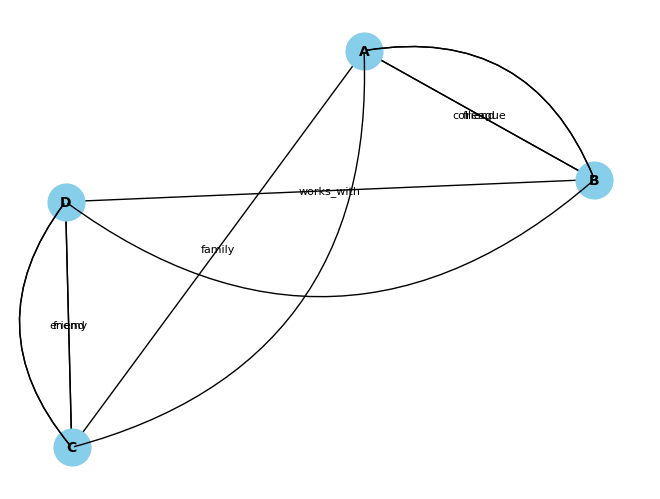

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def visualize_multigraph(triplets):
    """Visualizes a multigraph with edge labels."""
    graph = nx.MultiGraph()

    for u, label, v in triplets:
        graph.add_edge(u, v, label=label)

    pos = nx.spring_layout(graph, seed=42)

    nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")

    ax = plt.gca() #Get current axes

    for (u, v, key, data) in graph.edges(keys=True, data=True):
        label = data['label']
        rad = 0.4 #Control curvature
        arrowprops=dict(arrowstyle="-",color="black",
                        connectionstyle="arc3,rad="+str(rad),
                        linestyle="-")
        ax.annotate("",
                    xy=pos[u],
                    xytext=pos[v],
                    arrowprops=arrowprops)
        x = (pos[u][0] + pos[v][0]) / 2
        y = (pos[u][1] + pos[v][1]) / 2

        plt.text(x, y, label, fontsize=8, ha='center', va='center')

    plt.show()


# Example usage (with multiple edges)
triplets = [
    ("A", "friend", "B"),
    ("A", "colleague", "B"),  # Multiple edges between A and B
    ("A", "family", "C"),
    ("B", "works_with", "D"),
    ("C", "friend", "D"),
    ("C", "enemy", "D"), # Multiple edges between C and D
]

visualize_multigraph(triplets)


In [98]:
test_stsg = stsg_data[0]['stsg'][10]
test_stsg


[('person', 'in_front_of', 'towel'),
 ('person', 'holding', 'clothes'),
 ('person', 'in_front_of', 'clothes'),
 ('person', 'holding', 'blanket'),
 ('person', 'in_front_of', 'blanket')]

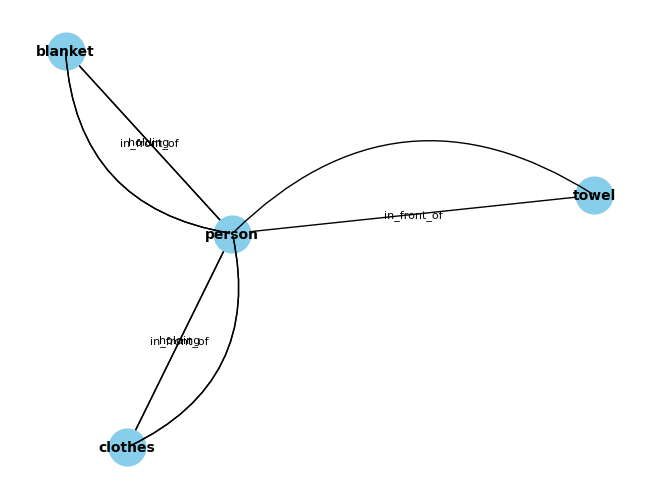

In [133]:
visualize_multigraph(test_stsg)
